https://www.kaggle.com/nadintamer/titanic-survival-predictions-beginner

In [1]:
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

1 numpy -> 벡터, 행렬

2 pandas -> 데이터 분석

6 seaborn -> matplotlib기반으로한 시각화패키지

In [2]:
#import train and test CSV files
train = pd.read_csv("./input/train.csv")
test = pd.read_csv("./input/test.csv")

#take a look at the training data
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Barah, Mr. Hanna Assi",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


2.3.주어진 데이터를 로드

6.train의 모든 열 반환 // train.head() 보다 정확하고 정보 상태 판별하기 쉬움

out obersvation 탑승객은 총 891명

In [3]:
#get a list of the features within the dataset
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


왜 하는건지 모르겠음 

In [4]:
#see a sample of the dataset to get an idea of the variables
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C
784,785,0,3,"Ali, Mr. William",male,25.0,0,0,SOTON/O.Q. 3101312,7.0500,NaN,S
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.3500,NaN,Q
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
120,121,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.5000,NaN,S


변수 파악 용 데이터 확인
train 중 무작위 샘플 5(적당한 아무수)개 추출


out 결과

Survived: int

Pclass: int

Name: string

Sex: string

Age: float

SibSp: int

Parch: int

Ticket: string

Fare: float

Cabin: string

Embarked: string

In [5]:
#check for any other unusable values
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


#isnull() : 정보가 결측(NULL)이면 True, 그렇지 않으면 False 의 boollean값 반환

#isnull().sum() : 그 결과 값들을 합함

result observation  나이 정보의 경우, 약 19.8%가 소실되었으나 생사 여부에 큰 영향을 끼친다고 판단 -> 소실정도를 커버할 수 있게해야함, 객실 정보는 약 77%가 소실 -> 사용하지 X

# 특징별 생존여부 분석
## 특징별 독립적 생존확률을 구한다.
(항목별 뚜렷한 차이가 있거나 시각화가 필요없는 경우에는 커널에 있는 비주얼라이징 생략한다)

# Some Predictions:
Sex: Females are more likely to survive.
SibSp/Parch: People traveling alone are more likely to survive.
Age: Young children are more likely to survive.
Pclass: People of higher socioeconomic class are more likely to survive.


### 성별

In [6]:
#print percentages of females vs. males that survive
print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)
print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


성별 별 생존확률 출력

train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1] :
성별 인덱스가 남성인 사람들의 생존인덱스의 값이 1인 사람들의 상대비율  

#value_counts() : 각 값의 개수

#normalize = True : 상대비율
#### result observation 여성이 남성보다 생존확률이 높았다.

### 손님 등급

In [7]:
#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


각 클래스별 생존 확률 출력
#### result observation 클래스가 높을수록(값이 작을수록) 생존확률이 높았다. 

### 형제자매/배우자

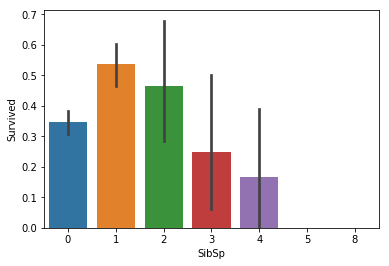

In [8]:
#draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=train)

train.describe(include = "all") 을 통해 sibsp의 범위가 [0,8]인 것은 알았지만 위의 visualization의 결과로 0, 1, 2, (3이상)만 해도 충분함을 알 수 있다.

In [9]:
print("Percentage of SibSp = 0 who survived:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


#### result observation 가정과 달리 형제,배우자가 1명인 사람의 생존확률이 가장 높았으며, 2명, 0명인 사람들의 생존확률이 그 뒤를 따랐다.

### 부모/자식

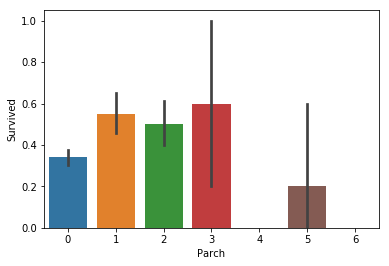

In [10]:
#draw a bar plot for Parch vs. survival
sns.barplot(x="Parch", y="Survived", data=train)
plt.show()

#### result observation 형제자매/배우자 항목과 비슷하게 0명인 경우가 가정과 달리 1,2,3 명인 경우 보다 생존확룔이 낮다. 또한 4명이상의 생존확률은 대체적으로 매우 낮다. 

### 나이

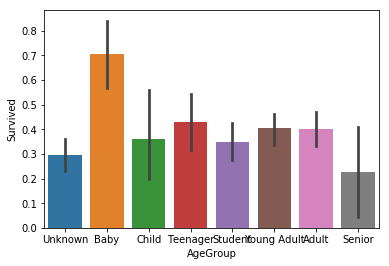

In [11]:
#sort the ages into logical categories
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

##### ??????????????????????????????????????????

#fillna() : 결측값의 경우 None 또는 np.nan 이 할당되는데 이 결측값을 대체할 수 있음.

2 & 3 나이를 알 수 없는 경우 -0.5로 대체해 표 가장 왼쪽에 위치하게끔 또는 계산에 포함되지 않게끔 한다.

#cut() : 동일 길이로 나누어서 범주를 만든다

6&7 out[2]에 따르면 나이는 0.42부터 80까지 분포해있는데 이러한 연속적 분포를 표로 나타내기 위해 동일 길이로 범위를 나눈다.

?? bins

#### result observation 아기의 경우 생존확룔이 가장 높다.

### 방번호

Percentage of CabinBool = 1 who survived: 66.66666666666666
Percentage of CabinBool = 0 who survived: 29.985443959243085


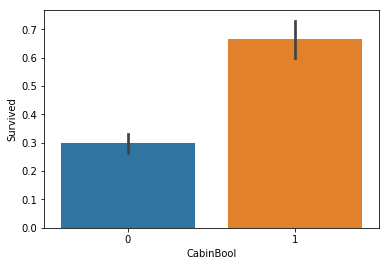

In [12]:
train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
test["CabinBool"] = (test["Cabin"].notnull().astype('int'))

#calculate percentages of CabinBool vs. survived
print("Percentage of CabinBool = 1 who survived:", train["Survived"][train["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of CabinBool = 0 who survived:", train["Survived"][train["CabinBool"] == 0].value_counts(normalize = True)[1]*100)
#draw a bar plot of CabinBool vs. survival
sns.barplot(x="CabinBool", y="Survived", data=train)
plt.show()

1 CabinBool 인덱스 추가

#notnull() : 결측이면 False, 결측이 아니면 True를 반환

#astype() : 문자열 칼럼을 숫자형으로 변환 

-> 결측이면 0, 결측이 아니면 1

5 방번호를 아는 사람들의 생존확률
train["Survived"][train["CabinBool"] == 1].value_counts(normalize = True)[1]


#### result observation 방번호가 기록된 경우 생존확률이 더 높다.

# 데이터 정리(결측값 채우기)

## Test Data

In [13]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8,NaN
top,NaN,NaN,"Ware, Mr. Frederick",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Young Adult,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,96,NaN
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN,0.217703
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN,0.413179
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN,0.000000


test output observation
총 418명의 승객, 운임 정보 1개, 20.5%가 소실되었으며 결측정보는 채워야한다

##### 라고 하는데 아까 결측채워서 이 표에서는 min = -0.5 인것만 알 수 있고 위의 자세사항은  보이지 않음.

## 방번호, 티켓번호

In [14]:
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

방번호, 티켓번호과 관련하여 유용한 정보를 빼오지 못할 것 같아 더 이상 취급하지 않는다.

In [15]:
#now we need to fill in the missing values in the Embarked feature
print("Number of people embarking in Southampton (S):")
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


In [16]:
#replacing the missing values in the Embarked feature with S
train = train.fillna({"Embarked": "S"})

항구 S가 과반수이기 때문에 결측 정보를 S로 대체해도 무방하다.

##### 항구 정보 진짜 하나도 안 중요할 것 같은데... 그냥 드랍하지.....

## 나이

나이의 경우 결측값이 많기때문에 승선항구처럼 모두 같은 값으로 채우는 것은 비논리적이다. 
#### 이름 속 호칭을 바탕으로 나이를 추측하는 것이 조금 더 합리적일 것이다.


In [17]:
#create a combined group of both datasets
combine = [train, test]

#extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


2 Age 에 대한 결측값을 더 유의미하게 채우기 위해 train과 test를 결합한 combine 생성

5 combine의 이름을 dataset의 title로 추출

out observation Lady, Capt, Col, Don, Dr, Major, Rev, Jonkheer, Dona 의 경우 그 수가 아주 적음을 알 수 있으며 그 외에도 그룹화할 수 있는 항목들이 더 있다,

In [18]:
#replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000



5 한두명씩 있던 항목은 Rare로 타이틀 대체

6 흔하지 않은 표현들은 흔한 표현으로 대체

11 ?

In [19]:
#map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0,1


1 Mr, Miss, Mrs, Master, Rotal, Rare 를 1부터 차례대로 mapping

4 더 이상 Mr, Miss, ...을 쓰지 않고 mapping 번호로 대체

5 결측값은 0으로 채우기

In [20]:
# fill missing age with mode age group for each title
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

#I tried to get this code to work with using .map(), but couldn't.
#I've put down a less elegant, temporary solution for now.
#train = train.fillna({"Age": train["Title"].map(age_title_mapping)})
#test = test.fillna({"Age": test["Title"].map(age_title_mapping)})

for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]
        
for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

mr:young, miss:student(왜?), mrs,royal,rare->adult, master->baby 그루핑하고 매핑한다.

In [21]:
#map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train.head()

#dropping the Age feature for now, might change
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

#dropping the Age feature for now, might change
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

KeyError: "labels ['Age'] not contained in axis"

나이그룹을 어린 순으로 매핑

12 ??? 왜 버리지?

### 이름

이름에서 더 이상 빼올 정보가 없으므로 drop 한다.

In [ ]:
#map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

### 승선항구

항구를 숫자로 매핑하고 항구이름을 매핑 번호로 대체한다.

In [ ]:
#map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

### 요금 정보

In [ ]:
#fill in missing Fare value in test set based on mean fare for that Pclass 
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x] #Pclass = 3
        test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)
        
#map Fare values into groups of numerical values
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

#drop Fare values
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

In [ ]:
#check train data
train.head()